# Perceptron 

- It's a basic model of Neural Network
- This algorith uses a step function to its classification
- It is a model of a single neuron that can be used for two-class classification problems
- It provides the foundation for later developing much larger networks (like Multi Layer Perceptron)
- It was one of the first models
    - _STEP_ function for binary classification
    - X1 and X2 multiplies by the wights and compare it with the BIAS
        - higher than X0 = bias = 1 ---> entra na classe 1
        - lower than X0 = bias ----> classe 0
    - X0 . theta0 + X1 . theta1 + X2 . theta2 

![perceptron](https://c.mql5.com/2/41/512210577402.png)

## Introduction

Perceptron was inspired in the human brain, specifically by the information processing of a single neural cell called a neuron.

Invented by Frank Rosenblatt, based in **McCulloch-Pitts** 's neuron.

- McCulloch-Pitts was different because it didn't had weights.
- This was a major advance for the perceptron, with weights we can do much more
- It's very basic, so now it's not used anymore ( perceptron )
- But the concept is simple and important for further comprehension
- The neuron's type is SIGMOIDAL -> trades the step function for the sigmoide function

## Implementation

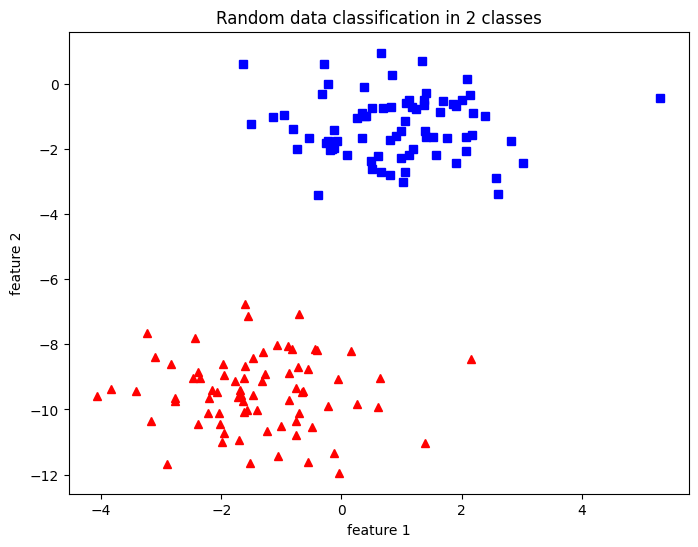

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# generating data for classification
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random data classification in 2 classes')
plt.show()

In [5]:
# implementing the Perceptron:
learning_rate = 0.5  # setting the learning rate, it's like the step of the coast function.
epochs = 100         # Number of iterations

# m-> trainning samples
# n-> features for each sample
m, n = X.shape

In [7]:
# creating the step function:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [9]:
# starting the weights (theta) with zero
# n+1 number of weighs + 1 that is the bias
theta = np.zeros((n+1,1))

# list of the missed results - wrongly classified for each iteration
n_miss_list = []

# trainning
for epoch in range(epochs):    # epochs = 100

    # variável que armazena número de amostras classificadas com rótulo errado.
    n_miss = 0

    # each trainning sample
    for idx, x_i in enumerate(X):

        # 1 is the first position of the feature vector
        # that value is multiplied by the weight, theta_0, that meand, the bias
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        # estimating the new label
        y_hat = step_func(np.dot(x_i.T, theta))

        # Compare the predicted label with the real one
        # squeeze removes one dimension
        if (np.squeeze(y_hat) - y[idx]) != 0:
            # if the classifier make some mistake, the error != 0, the weights (theta) will be optimized 
            theta += learning_rate*((y[idx] - y_hat)*x_i)

            # error count 
            n_miss += 1

    # at the end of this epoch, the error count is added at the list
    n_miss_list.append(n_miss)

## Evaluating the model:

In [ ]:
# y = mx+c = theta0.X0 + theta1.X1 + theta2.X2
# Resolvendo podemos encontrar m e c
x1 = [min(X[:,0]), max(X[:,0])]
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m*x1 + c

# Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("característica 1")
plt.ylabel("característica 2")
plt.title('Algoritmo Perceptron')
plt.plot(x1, x2, 'y-')